# Workflow
This notebook is a demonstration of training workflow for NN correcting model error accompanying: Chen, Tse-Chun, Stephen G. Penny, Jeffrey S. Whitaker, Sergey Frolov, Robert Pincus, and Stefan Tulich. “Correcting Systematic and State-Dependent Errors in the NOAA FV3-GFS Using Neural Networks.” In Prep.

## Evironment
- linux cluster with slurm scheduler
- limited GPU access time


In [1]:
import os
import sys
import time

import numpy as np
import pandas as pd
import xarray as xr
import matplotlib as mpl
import matplotlib.colors as colors
import matplotlib.pyplot as plt
plt.style.use('seaborn-poster')

import logging
logging.basicConfig(level=logging.INFO)

## Prepare reduced dataset:
- requires climate data operator ([CDO](https://code.mpimet.mpg.de/projects/cdo/wiki/Cdo#Documentation)) package for gridded data reduction
- run command:

In [2]:
os.system("bash reduce_dataset.sh")

Wed May  4 18:24:03 PDT 2022
2019122000 convert to low res
2019122006 convert to low res
2019122012 convert to low res
2019122018 convert to low res
Wed May  4 18:24:03 PDT 2022


0

- takes about 15 mins
- output expected in “./sample_nc/2019122000/”, if not already exists.
    - bfg_2019122000_fhr06_control_sub
    - bfg_2019122000_fhr06_control_low
    - sfg_2019122000_fhr06_control_sub
    - sfg_2019122000_fhr06_control_low
    - sfg_2019122000_fhr00_control_sub
    - sfg_2019122000_fhr00_control_low
    - control/INPUT/fv3_increment6.nc_sub
    - control/INPUT/fv3_increment6.nc_low

In [3]:
!ls ./sample_nc/2019122000/*_control_* ./sample_nc/2019122000/control/INPUT/*nc_*

./sample_nc/2019122000/bfg_2019122000_fhr06_control_low
./sample_nc/2019122000/bfg_2019122000_fhr06_control_sub
./sample_nc/2019122000/control/INPUT/fv3_increment6.nc_low
./sample_nc/2019122000/control/INPUT/fv3_increment6.nc_sub
./sample_nc/2019122000/sfg_2019122000_fhr00_control_low
./sample_nc/2019122000/sfg_2019122000_fhr00_control_sub
./sample_nc/2019122000/sfg_2019122000_fhr06_control_low
./sample_nc/2019122000/sfg_2019122000_fhr06_control_sub


## Preprocess dataset into numpy arrays

- requires python packages: joblib, pandas, xarray, numpy
- takes reduced dataset in nc format to numpy array files
- run command:

In [7]:
os.system("python preprocess.py")

nlat=32, nlon=64
sfc size: 31, var in size: 1398, var out size: 890, date size: 3
2019-12-20 06:00:00
2019-12-20 00:00:00
2019-12-20 12:00:00


0

- output expected in “./npys/”
    - ifs_f06_ranl_low
    - ifs_f06_ranl_sub
    - ifs_out_ranl_low
    - ifs_out_ranl_sub
    - ifs_sfc_ranl_low
    - ifs_sfc_ranl_sub

In [5]:
!ls ./npys/ifs*ranl_???

./npys/ifs_f06_ranl_low  ./npys/ifs_out_ranl_low  ./npys/ifs_sfc_ranl_low
./npys/ifs_f06_ranl_sub  ./npys/ifs_out_ranl_sub  ./npys/ifs_sfc_ranl_sub


## Get mean and std profile for normalization

- requires python packages: numpy
- computed from the previously produced numpy files
- run command:

In [9]:
!python get_mean_std.py

- output expected in "./npys"
    - ifs_sfc_ranl_sub_std_1d.npy
    - ifs_sfc_ranl_sub_mean_1d.npy
    - ifs_sfc_ranl_low_std_1d.npy
    - ifs_sfc_ranl_low_mean_1d.npy
    - ifs_out_ranl_sub_std_1d.npy
    - ifs_out_ranl_sub_mean_1d.npy
    - ifs_out_ranl_low_std_1d.npy
    - ifs_out_ranl_low_mean_1d.npy
    - ifs_f06_ranl_sub_std_1d.npy
    - ifs_f06_ranl_sub_mean_1d.npy
    - ifs_f06_ranl_low_std_1d.npy
    - ifs_f06_ranl_low_mean_1d.npy

In [6]:
!ls ./npys/*1d.npy

./npys/ifs_f06_ranl_low_mean_1d.npy  ./npys/ifs_out_ranl_sub_mean_1d.npy
./npys/ifs_f06_ranl_low_std_1d.npy   ./npys/ifs_out_ranl_sub_std_1d.npy
./npys/ifs_f06_ranl_sub_mean_1d.npy  ./npys/ifs_sfc_ranl_low_mean_1d.npy
./npys/ifs_f06_ranl_sub_std_1d.npy   ./npys/ifs_sfc_ranl_low_std_1d.npy
./npys/ifs_out_ranl_low_mean_1d.npy  ./npys/ifs_sfc_ranl_sub_mean_1d.npy
./npys/ifs_out_ranl_low_std_1d.npy   ./npys/ifs_sfc_ranl_sub_std_1d.npy


## Submit training program

- requires python packages: pandas, xarray, numpy, torch
- run command:

In [11]:
!python submit_monitor.py

INFO:root:There are 8 of combinations!!
INFO:root:No jobs running currently!
INFO:root:running ids: []
INFO:root:total running ids: 0
INFO:root:skipping still running combinations: 0
[Parallel(n_jobs=20)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Done   2 out of   8 | elapsed:    0.8s remaining:    2.4s
[Parallel(n_jobs=20)]: Done   3 out of   8 | elapsed:    0.8s remaining:    1.4s
[Parallel(n_jobs=20)]: Done   4 out of   8 | elapsed:    0.8s remaining:    0.8s
[Parallel(n_jobs=20)]: Done   5 out of   8 | elapsed:    0.8s remaining:    0.5s
[Parallel(n_jobs=20)]: Done   6 out of   8 | elapsed:    0.9s remaining:    0.3s
[Parallel(n_jobs=20)]: Done   8 out of   8 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=20)]: Done   8 out of   8 | elapsed:    0.9s finished
INFO:root:Took 0.8771622180938721s to scan through all combinations
INFO:root:8/8 training to be (re)submitted
INFO:root:There are 1.0 of batches!!
INFO:root:submitting to jobid: 0
Su

- this will produce “./jobs/job000.py” and from it, submit (via slurm) 8 training tasks to 1 node (1 gpu for each)
- takes about 1 min to finish this training example.
- expect training checkpoint files in "./checks/". they will be updated during training.
- the checkpoint files are named using the specified hyperparameter

In [7]:
!ls ./checks/conv2d*_sub

./checks/conv2d_tpsuvq_subset-cyc_q_2_1_128_2_0.25_8_mse_1e-05_0.01_sub
./checks/conv2d_tpsuvq_subset-cyc_q_2_1_128_2_0.25_8_mse_1e-05_0.05_sub
./checks/conv2d_tpsuvq_subset-cyc_t_2_1_128_2_0.25_8_mse_1e-05_0.01_sub
./checks/conv2d_tpsuvq_subset-cyc_t_2_1_128_2_0.25_8_mse_1e-05_0.05_sub
./checks/conv2d_tpsuvq_subset-cyc_u_2_1_128_2_0.25_8_mse_1e-05_0.01_sub
./checks/conv2d_tpsuvq_subset-cyc_u_2_1_128_2_0.25_8_mse_1e-05_0.05_sub
./checks/conv2d_tpsuvq_subset-cyc_v_2_1_128_2_0.25_8_mse_1e-05_0.01_sub
./checks/conv2d_tpsuvq_subset-cyc_v_2_1_128_2_0.25_8_mse_1e-05_0.05_sub


## Evaluation
### Load some more packages

In [2]:
from check_model import sub_collect_models, sub_eval_model, sub_saliency

### Collect hyperparameters and training status for all trained model
* run command:

In [15]:
if_renew=False
df = sub_collect_models(if_renew=if_renew, df='df_low-res-config', if_wait=True)

INFO:root:reading df from file.


- takes about 30s
- results will be in data frame format. return as df and saved.
- expect output "df_low-res-config" in "./checks"

In [8]:
!ls ./checks/df*

./checks/df_low-res-config


In [17]:
df

,model_type,vars_f06,vars_sfc,vars_out,testset,kernel_sizes,channels,n_conv,p,bs,loss,lr,wd,trunc,filename,epoches,impatience,valid_min
0,conv2d,tpsuvq,subset-cyc,q,2,1,128,2,0.25,8,mse,0.00001,0.01,sub,/home/Tse-chun.Chen/anal_inc/rply-inc-mdl-err-...,500,0,0.012005
1,conv2d,tpsuvq,subset-cyc,q,2,1,128,2,0.25,8,mse,0.00001,0.05,sub,/home/Tse-chun.Chen/anal_inc/rply-inc-mdl-err-...,500,0,0.012005
2,conv2d,tpsuvq,subset-cyc,t,2,1,128,2,0.25,8,mse,0.00001,0.01,sub,/home/Tse-chun.Chen/anal_inc/rply-inc-mdl-err-...,500,0,0.012008
3,conv2d,tpsuvq,subset-cyc,t,2,1,128,2,0.25,8,mse,0.00001,0.05,sub,/home/Tse-chun.Chen/anal_inc/rply-inc-mdl-err-...,500,0,0.012008
4,conv2d,tpsuvq,subset-cyc,u,2,1,128,2,0.25,8,mse,0.00001,0.01,sub,/home/Tse-chun.Chen/anal_inc/rply-inc-mdl-err-...,500,0,0.012109
5,conv2d,tpsuvq,subset-cyc,u,2,1,128,2,0.25,8,mse,0.00001,0.05,sub,/home/Tse-chun.Chen/anal_inc/rply-inc-mdl-err-...,500,0,0.012109
6,conv2d,tpsuvq,subset-cyc,v,2,1,128,2,0.25,8,mse,0.00001,0.01,sub,/home/Tse-chun.Chen/anal_inc/rply-inc-mdl-err-...,500,0,0.012187
7,conv2d,tpsuvq,subset-cyc,v,2,1,128,2,0.25,8,mse,0.00001,0.05,sub,/home/Tse-chun.Chen/anal_inc/rply-inc-mdl-err-...,500,0,0.012187


- data frame allows for versatile viewing of the collected models

In [18]:
[list(np.unique(df[i],axis=0)) for i in ['kernel_sizes','channels','n_conv','p','lr','wd',]]

[[1], [128], [2], [0.25], [1e-05], [0.01, 0.05]]

In [19]:
df[(df.vars_out=='t')&(df.vars_sfc=='subset-cyc')].groupby(['kernel_sizes', 'n_conv','channels','bs', 'trunc']).valid_min.min()

kernel_sizes  n_conv  channels  bs  trunc
1             2       128       8   sub      0.012008
Name: valid_min, dtype: float64

### Column NN, subsampled dataset
- find and evaluate (using testing dataset) the models having minimal validation loss for each variable
- run command:

In [16]:
if_renew=False
for var in ['t','q','u','v']: # loop through variables
    time.sleep(10)
    filename = df[(df.vars_out==var) & (df.trunc=='sub') & (df.vars_sfc=='subset-cyc')].sort_values('valid_min').iloc[0].filename # find model that has minimal validation loss
    logging.info(var)
    logging.info(filename)
    if if_renew:
        sub_eval_model(filename,if_renew=True,if_wait=False) # submit evaluation
        #print(filename)
    else:
        y_pred, y=sub_eval_model(filename,if_renew=False,if_wait=True) # read from previous evaluation (if exists) and output
        logging.info("MSE: {}".format(np.mean((y-y_pred)**2)))


INFO:root:t
INFO:root:/home/Tse-chun.Chen/anal_inc/rply-inc-mdl-err-crct//checks/conv2d_tpsuvq_subset-cyc_t_2_1_128_2_0.25_8_mse_1e-05_0.01_sub
INFO:root:model evaled before. reading from file.
INFO:root:finished
INFO:root:Learned percentage: 0.023318111896514893
INFO:root:R2:  0.023318111896514893
INFO:root:MSE: 0.9766820073127747
INFO:root:MSE: 0.9766820073127747
INFO:root:q
INFO:root:/home/Tse-chun.Chen/anal_inc/rply-inc-mdl-err-crct//checks/conv2d_tpsuvq_subset-cyc_q_2_1_128_2_0.25_8_mse_1e-05_0.05_sub
INFO:root:model evaled before. reading from file.
INFO:root:finished
INFO:root:Learned percentage: 0.02360433340072632
INFO:root:R2:  0.02360433340072632
INFO:root:MSE: 0.9763954877853394
INFO:root:MSE: 0.9763954877853394
INFO:root:u
INFO:root:/home/Tse-chun.Chen/anal_inc/rply-inc-mdl-err-crct//checks/conv2d_tpsuvq_subset-cyc_u_2_1_128_2_0.25_8_mse_1e-05_0.01_sub
INFO:root:model evaled before. reading from file.
INFO:root:finished
INFO:root:Learned percentage: 0.015153765678405762
IN

- expect output prediction "y_pred_\*" and truth "y_\*" for testing period in "./npys/"

In [9]:
!ls ./npys/y*

./npys/y_conv2d_tpsuvq_subset-cyc_q_2_1_128_2_0.25_8_mse_1e-05_0.05_sub.npy
./npys/y_conv2d_tpsuvq_subset-cyc_t_2_1_128_2_0.25_8_mse_1e-05_0.01_sub.npy
./npys/y_conv2d_tpsuvq_subset-cyc_u_2_1_128_2_0.25_8_mse_1e-05_0.01_sub.npy
./npys/y_conv2d_tpsuvq_subset-cyc_v_2_1_128_2_0.25_8_mse_1e-05_0.01_sub.npy
./npys/ypred_conv2d_tpsuvq_subset-cyc_q_2_1_128_2_0.25_8_mse_1e-05_0.05_sub.npy
./npys/ypred_conv2d_tpsuvq_subset-cyc_t_2_1_128_2_0.25_8_mse_1e-05_0.01_sub.npy
./npys/ypred_conv2d_tpsuvq_subset-cyc_u_2_1_128_2_0.25_8_mse_1e-05_0.01_sub.npy
./npys/ypred_conv2d_tpsuvq_subset-cyc_v_2_1_128_2_0.25_8_mse_1e-05_0.01_sub.npy


### Saliency map
- compute the averaged gradients of the models using the checkpoint files
- run command:

In [4]:
J = []
checks = ['./checks/conv2d_tpsuvq_subset-cyc_t_2_1_128_2_0.25_8_mse_1e-05_0.05_sub',
          './checks/conv2d_tpsuvq_subset-cyc_q_2_1_128_2_0.25_8_mse_1e-05_0.05_sub',
          './checks/conv2d_tpsuvq_subset-cyc_u_2_1_128_2_0.25_8_mse_1e-05_0.05_sub',
          './checks/conv2d_tpsuvq_subset-cyc_v_2_1_128_2_0.25_8_mse_1e-05_0.05_sub'] # compute from the checkpoint files

for filename in checks:
    J.append(sub_saliency(filename=filename, if_renew=False))

INFO:root:saliency eval 1st time. will take longer.


Submitted batch job 31270294


INFO:root:finished
INFO:root:saliency eval 1st time. will take longer.


Submitted batch job 31270296


INFO:root:finished
INFO:root:saliency eval 1st time. will take longer.


Submitted batch job 31270301


INFO:root:finished
INFO:root:saliency eval 1st time. will take longer.


Submitted batch job 31270324


INFO:root:finished


- takes 1.5 mins
- expect output in "./npys"

In [10]:
!ls ./npys/J*

./npys/J_conv2d_tpsuvq_subset-cyc_q_2_1_128_2_0.25_8_mse_1e-05_0.05_sub.npy
./npys/J_conv2d_tpsuvq_subset-cyc_t_2_1_128_2_0.25_8_mse_1e-05_0.05_sub.npy
./npys/J_conv2d_tpsuvq_subset-cyc_u_2_1_128_2_0.25_8_mse_1e-05_0.05_sub.npy
./npys/J_conv2d_tpsuvq_subset-cyc_v_2_1_128_2_0.25_8_mse_1e-05_0.05_sub.npy


In [6]:
J_all = np.concatenate(J) # put the gradients for differents variables together

# reorganize for T,Q,U,V
J_TQUV = np.zeros((508,508))
J_TQUV[:,0:127] = J_all[:,0:127]
J_TQUV[:,0+127*1:0+127*2] = J_all[:,1+127*3:1+127*4]
J_TQUV[:,0+127*2:0+127*4] = J_all[:,1+127*1:1+127*3]

# reorganize for boundary condition
J_bc = np.zeros((508,29))
J_bc[:,0] = J_all[:,127]
J_bc[:,1:29] = J_all[:,-28:]

# make yticks for plot
sample = xr.open_dataset('./sample_nc/2019122000/sfg_2019122000_fhr00_control')
pfulls = [1000, 850,500,150,10,0.01]
yticks = (np.interp(pfulls, sample.pfull.values,range(127),),pfulls)
yticks_0 = np.concatenate([yticks[0], yticks[0][:-1]+127, yticks[0][:-1]+127*2, yticks[0][:-1]+127*3,])
yticks_1 = yticks[1] + yticks[1][:-1]*3


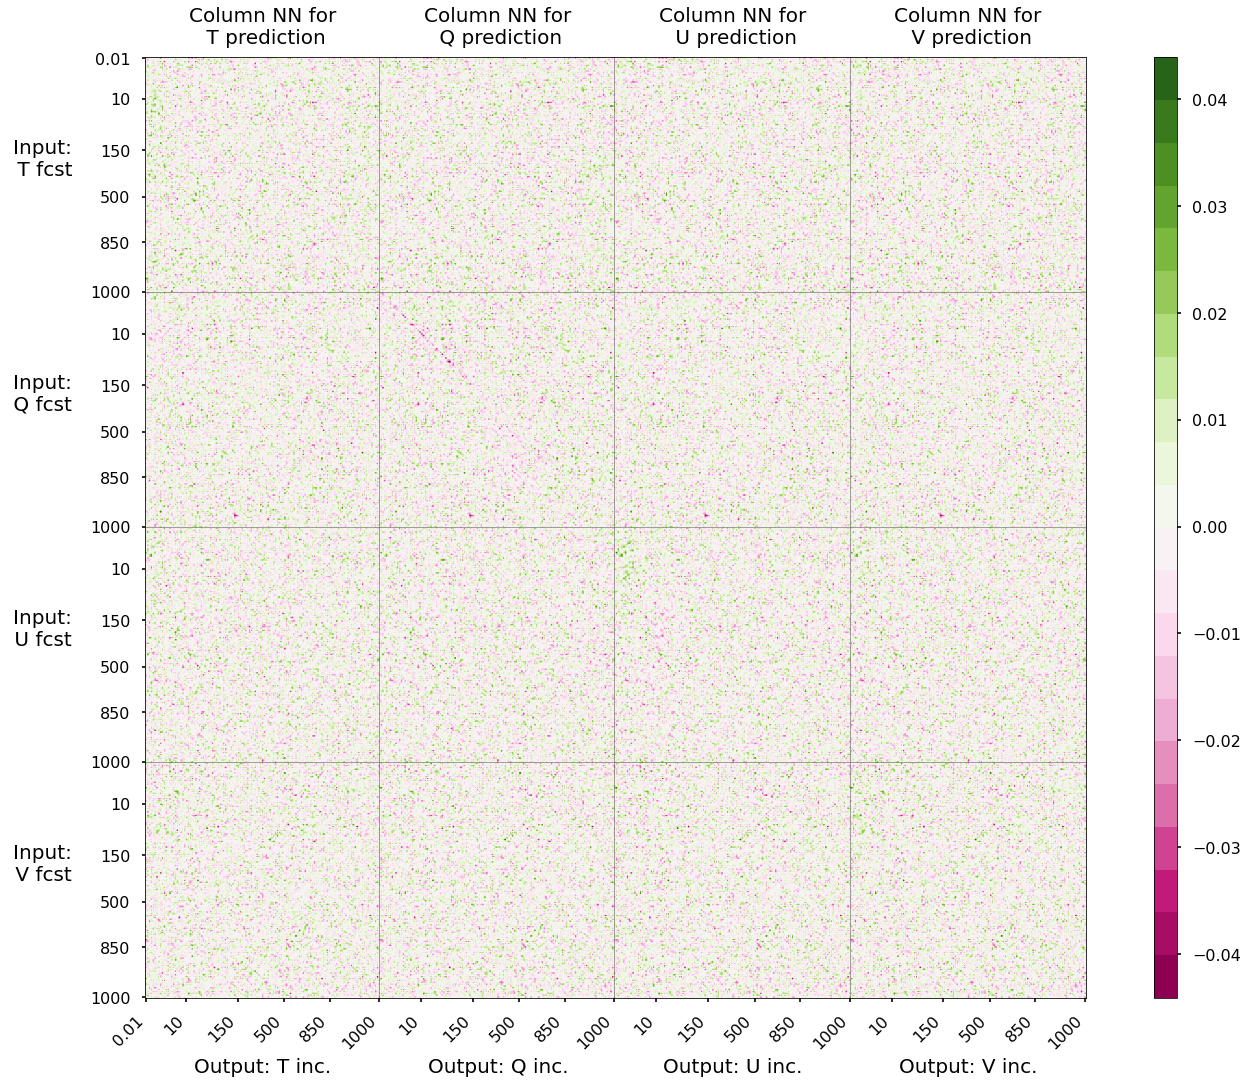

In [10]:
cmap = mpl.cm.get_cmap('PiYG',22)

plt.figure(figsize=(20,15))
plt.imshow(J_TQUV.T, cmap=cmap,#,vmax=0.1,vmin=-0.1)
           #norm=colors.SymLogNorm(linthresh=0.05, linscale=1,
           #                                   vmin=-1, vmax=1)
          )
lw=0.5
c='0.3'
plt.axvline(126,c=c,lw=lw)
plt.axvline(126+127*1,c=c,lw=lw)
plt.axvline(126+127*2,c=c,lw=lw)
plt.axhline(126,c=c,lw=lw)
plt.axhline(126+127*1,c=c,lw=lw)
plt.axhline(126+127*2,c=c,lw=lw)

plt.yticks(yticks_0, yticks_1)
plt.xticks(yticks_0, yticks_1, rotation='45',ha='right')

plt.colorbar(aspect=40)
#plt.ylabel('Input\n forecast\n [hPa]',rotation='0', ha='right')
#plt.xlabel('Output correction [hPa]')
for i in range(4):
    plt.text([63,63+127,63+127*2,63+127*3][i], 508+40, f"Output: {['T','Q','U','V'][i]} inc.",fontsize=20, ha='center')
    plt.text([63,63+127,63+127*2,63+127*3][i], -8, f"Column NN for\n {['T','Q','U','V'][i]} prediction",fontsize=20, ha='center')
    plt.text(-40, [63,63+127,63+127*2,63+127*3][i], f"Input:\n {['T','Q','U','V'][i]} fcst",fontsize=20, ha='right')

plt.tight_layout()


In [12]:
# make yticks
yticks_bc=np.array(['log(surface pressure)','aerodynamic conductance',
                    'canopy water evaporation gfs lsm','direct evaporation from bare soil gfs lsm',
                    'sublimation (evaporation from snow) gfs lsm','snow phase change heat flux gfs lsm',
                    'snow cover gfs lsm','surface storm water runoff gfs lsm','transpiration gfs lsm',
                    'surface temperature','surface temperature over ice','2m specific humidity',
                    'averaged potential evaporation rate','surface roughness','averaged albedo',
                    'clear sky downward long wave flux','clear sky downward short wave flux',
                    'clear sky upward long wave flux', 'clear sky upward long wave flux at toa',
                    'clear sky upward short wave flux', 'clear sky upward short wave flux at toa',
                    'land-sea-ice mask', 'latitude','sin(longitude)','cos(longitude)',
                    'sin(hour of the day)','sin(day of the year)','cos(hour of the day)','cos(day of the year)', ])


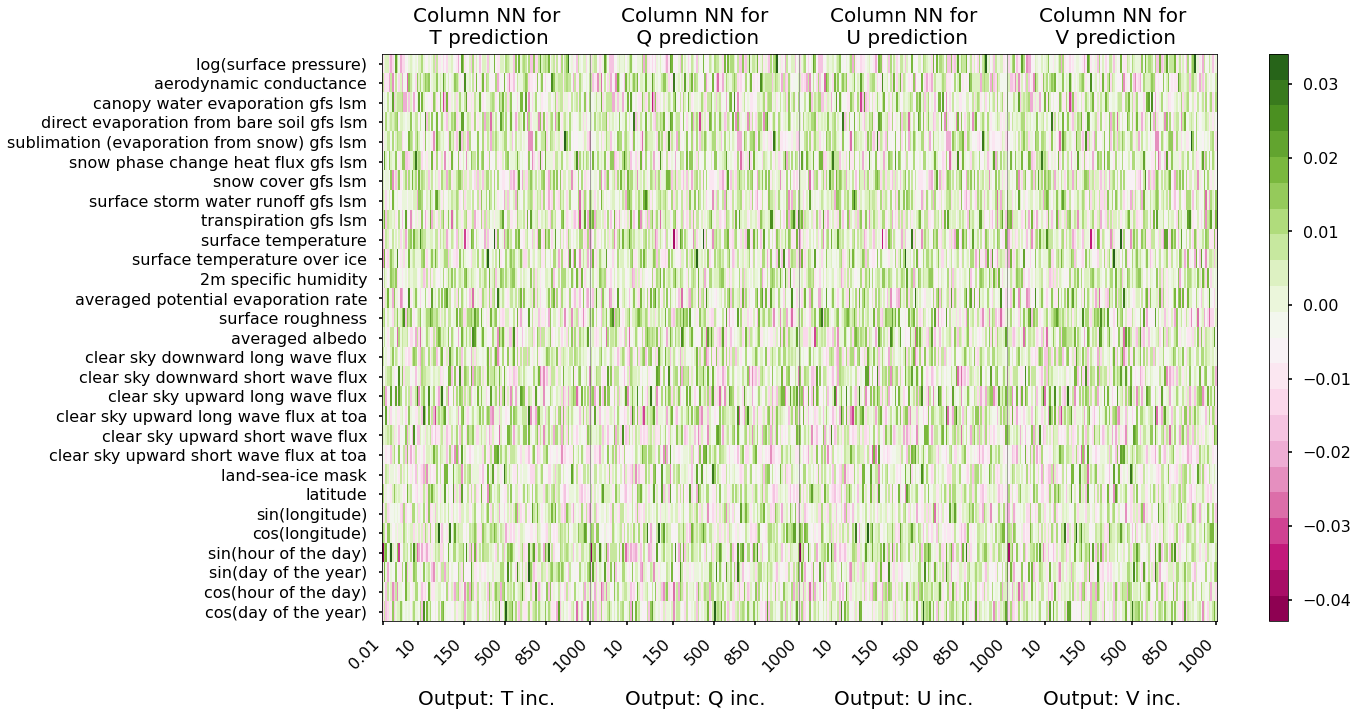

In [13]:
cmap = mpl.cm.get_cmap('PiYG',22)
plt.figure(figsize=(20,10))
plt.imshow(J_bc.T,cmap=cmap,aspect='auto', interpolation='nearest',
           #norm=colors.SymLogNorm(linthresh=0.05, linscale=1,
           #                                   vmin=-1, vmax=1)
          )
lw=0.5
c='0.3'
plt.axvline(126,c=c,lw=lw)
plt.axvline(126+127*1,c=c,lw=lw)
plt.axvline(126+127*2,c=c,lw=lw)
plt.xticks(yticks_0, yticks_1, rotation='45',ha='right')
plt.yticks(range(29),yticks_bc,)
for i in range(4):
    plt.text([63,63+127,63+127*2,63+127*3][i], 32, f"Output: {['T','Q','U','V'][i]} inc.",fontsize=20, ha='center',va='top')
    plt.text([63,63+127,63+127*2,63+127*3][i], -1, f"Column NN for\n {['T','Q','U','V'][i]} prediction",fontsize=20, ha='center')
    
plt.colorbar(aspect=30)
plt.tight_layout()
